In [12]:
import os
import sys
import numpy as np
import pandas as pd

sys.path.append(os.path.abspath(".."))
from common import common

In [4]:
%run ../datasets/thyroid.ipynb

Normal class:  0    -
Name: target, dtype: object
TARGET_DICT {0: 'F', 1: 'G', 2: 'I', 3: 'K', 4: 'N', 5: 'None'}
NORMAL_TARGET 5
main_labels Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'target'],
      dtype='object')
age [40 35 77 73 74 60 66 42 29 44 78 28 58 46 97 57 24]
sex [0 1]
on_thyroxine [0 1]
query_on_thyroxine [0]
on_antithyroid_meds [0]
sick [0]
pregnant [0]
thyroid_surgery [0 1]
I131_treatment [0]
query_hypothyroid [0]
query_hyperthyroid [0]
lithium [0]
goitre [0]
tumor [0 1]
hypopituitary [0]
psych [0]
TSH_measured [1]
TSH [7.0e+01 1.4e-01 9.0e-02 1.1e+00 1.8e+00 1.4e+00 8.5e-02 1.2e+00 

In [5]:
all_df, main_labels, config = get_processed_thyroid_df()
all_df.head()

Normal class:  0    -
Name: target, dtype: object
TARGET_DICT {0: 'F', 1: 'G', 2: 'I', 3: 'K', 4: 'N', 5: 'None'}
NORMAL_TARGET 5
main_labels Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'target'],
      dtype='object')


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target
167,40,0,0,0,0,0,0,0,0,0,...,1,3.9,1,0.83,1,5.0,1,28.0,0,0
5256,35,0,0,0,0,0,0,1,0,0,...,1,73.0,1,1.16,1,63.0,1,37.0,0,5
6044,77,0,0,0,0,0,0,0,0,0,...,1,120.0,1,0.96,1,124.0,1,45.0,1,5
6045,73,1,0,0,0,0,0,0,0,0,...,1,89.0,1,0.74,1,119.0,1,24.0,1,5
6747,77,0,0,0,0,0,0,0,0,0,...,1,131.0,1,1.04,1,126.0,1,25.0,1,3


In [6]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 167 to 8116
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  20 non-null     int64  
 1   sex                  20 non-null     int64  
 2   on_thyroxine         20 non-null     int64  
 3   query_on_thyroxine   20 non-null     int64  
 4   on_antithyroid_meds  20 non-null     int64  
 5   sick                 20 non-null     int64  
 6   pregnant             20 non-null     int64  
 7   thyroid_surgery      20 non-null     int64  
 8   I131_treatment       20 non-null     int64  
 9   query_hypothyroid    20 non-null     int64  
 10  query_hyperthyroid   20 non-null     int64  
 11  lithium              20 non-null     int64  
 12  goitre               20 non-null     int64  
 13  tumor                20 non-null     int64  
 14  hypopituitary        20 non-null     int64  
 15  psych                20 non-null     int64 

In [7]:
all_df.isnull().sum()

age                    0
sex                    0
on_thyroxine           0
query_on_thyroxine     0
on_antithyroid_meds    0
sick                   0
pregnant               0
thyroid_surgery        0
I131_treatment         0
query_hypothyroid      0
query_hyperthyroid     0
lithium                0
goitre                 0
tumor                  0
hypopituitary          0
psych                  0
TSH_measured           0
TSH                    0
T3_measured            0
T3                     0
TT4_measured           0
TT4                    0
T4U_measured           0
T4U                    0
FTI_measured           0
FTI                    0
TBG_measured           0
TBG                    0
referral_source        0
target                 0
dtype: int64

In [8]:
all_df.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target
count,20.000000,20.000000,20.000000,20.0,20.0,20.0,20.0,20.000000,20.0,20.0,...,20.0,20.000000,20.0,20.000000,20.0,20.000000,20.0,20.000000,20.000000,20.000000
mean,55.000000,0.250000,0.050000,0.0,0.0,0.0,0.0,0.050000,0.0,0.0,...,1.0,110.645000,1.0,0.947000,1.0,116.850000,1.0,30.500000,0.700000,4.250000
std,20.380589,0.444262,0.223607,0.0,0.0,0.0,0.0,0.223607,0.0,0.0,...,0.0,36.379498,0.0,0.145063,0.0,35.618261,0.0,14.798649,0.470162,1.517442
min,24.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,1.0,3.900000,1.0,0.740000,1.0,5.000000,1.0,15.000000,0.000000,0.000000
25%,38.750000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,1.0,92.750000,1.0,0.827500,1.0,107.750000,1.0,22.000000,0.000000,4.750000
50%,57.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,1.0,116.000000,1.0,0.925000,1.0,124.500000,1.0,27.500000,1.000000,5.000000
75%,73.250000,0.250000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,1.0,132.000000,1.0,1.047500,1.0,129.750000,1.0,32.750000,1.000000,5.000000
max,97.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,...,1.0,176.000000,1.0,1.270000,1.0,173.000000,1.0,86.000000,1.000000,5.000000


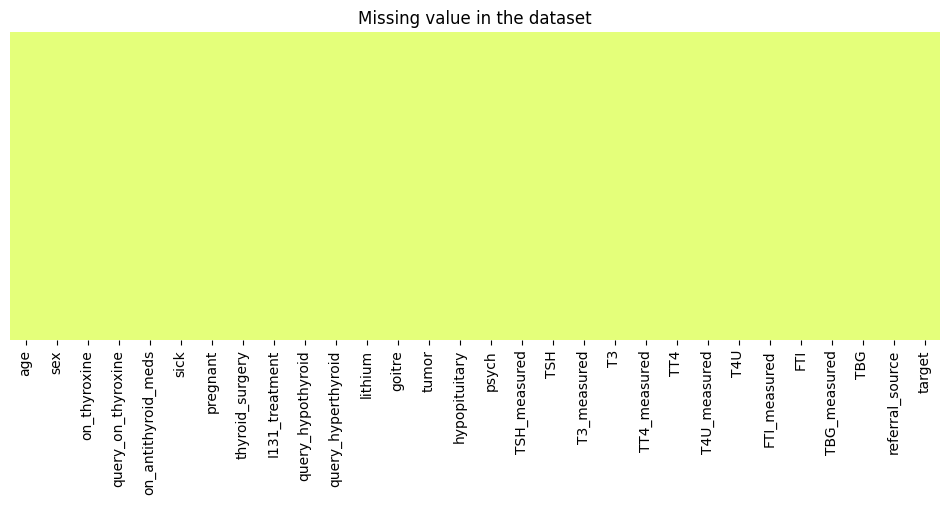

In [9]:
common.show_missing_values(all_df)

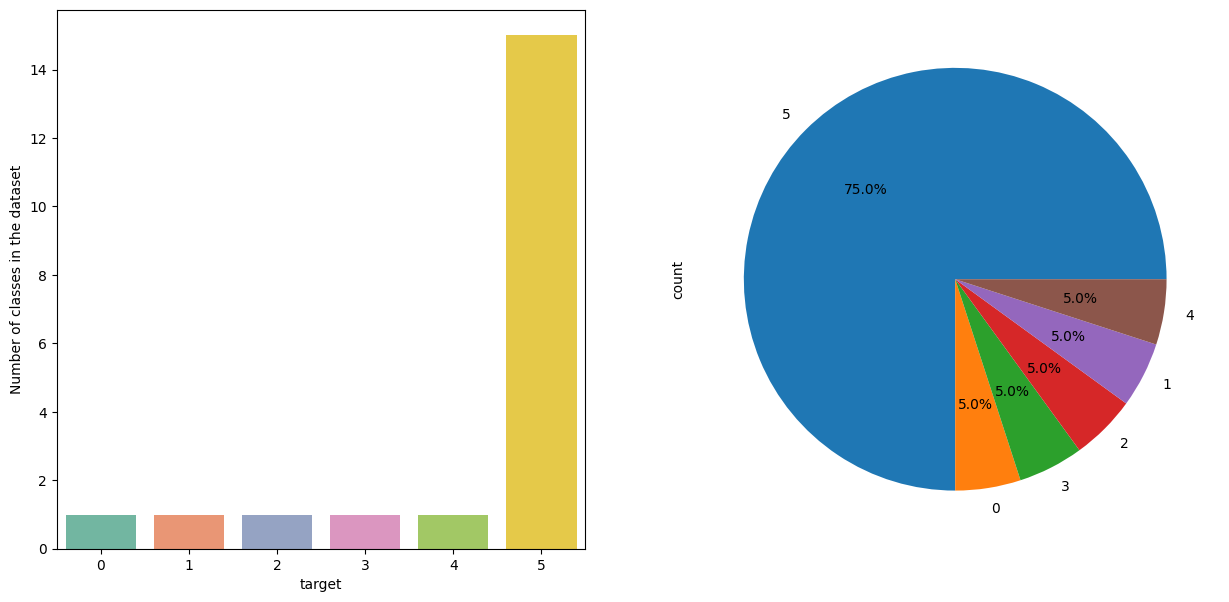

In [10]:
common.show_target_values(all_df, config['TARGET_COLUMN'])

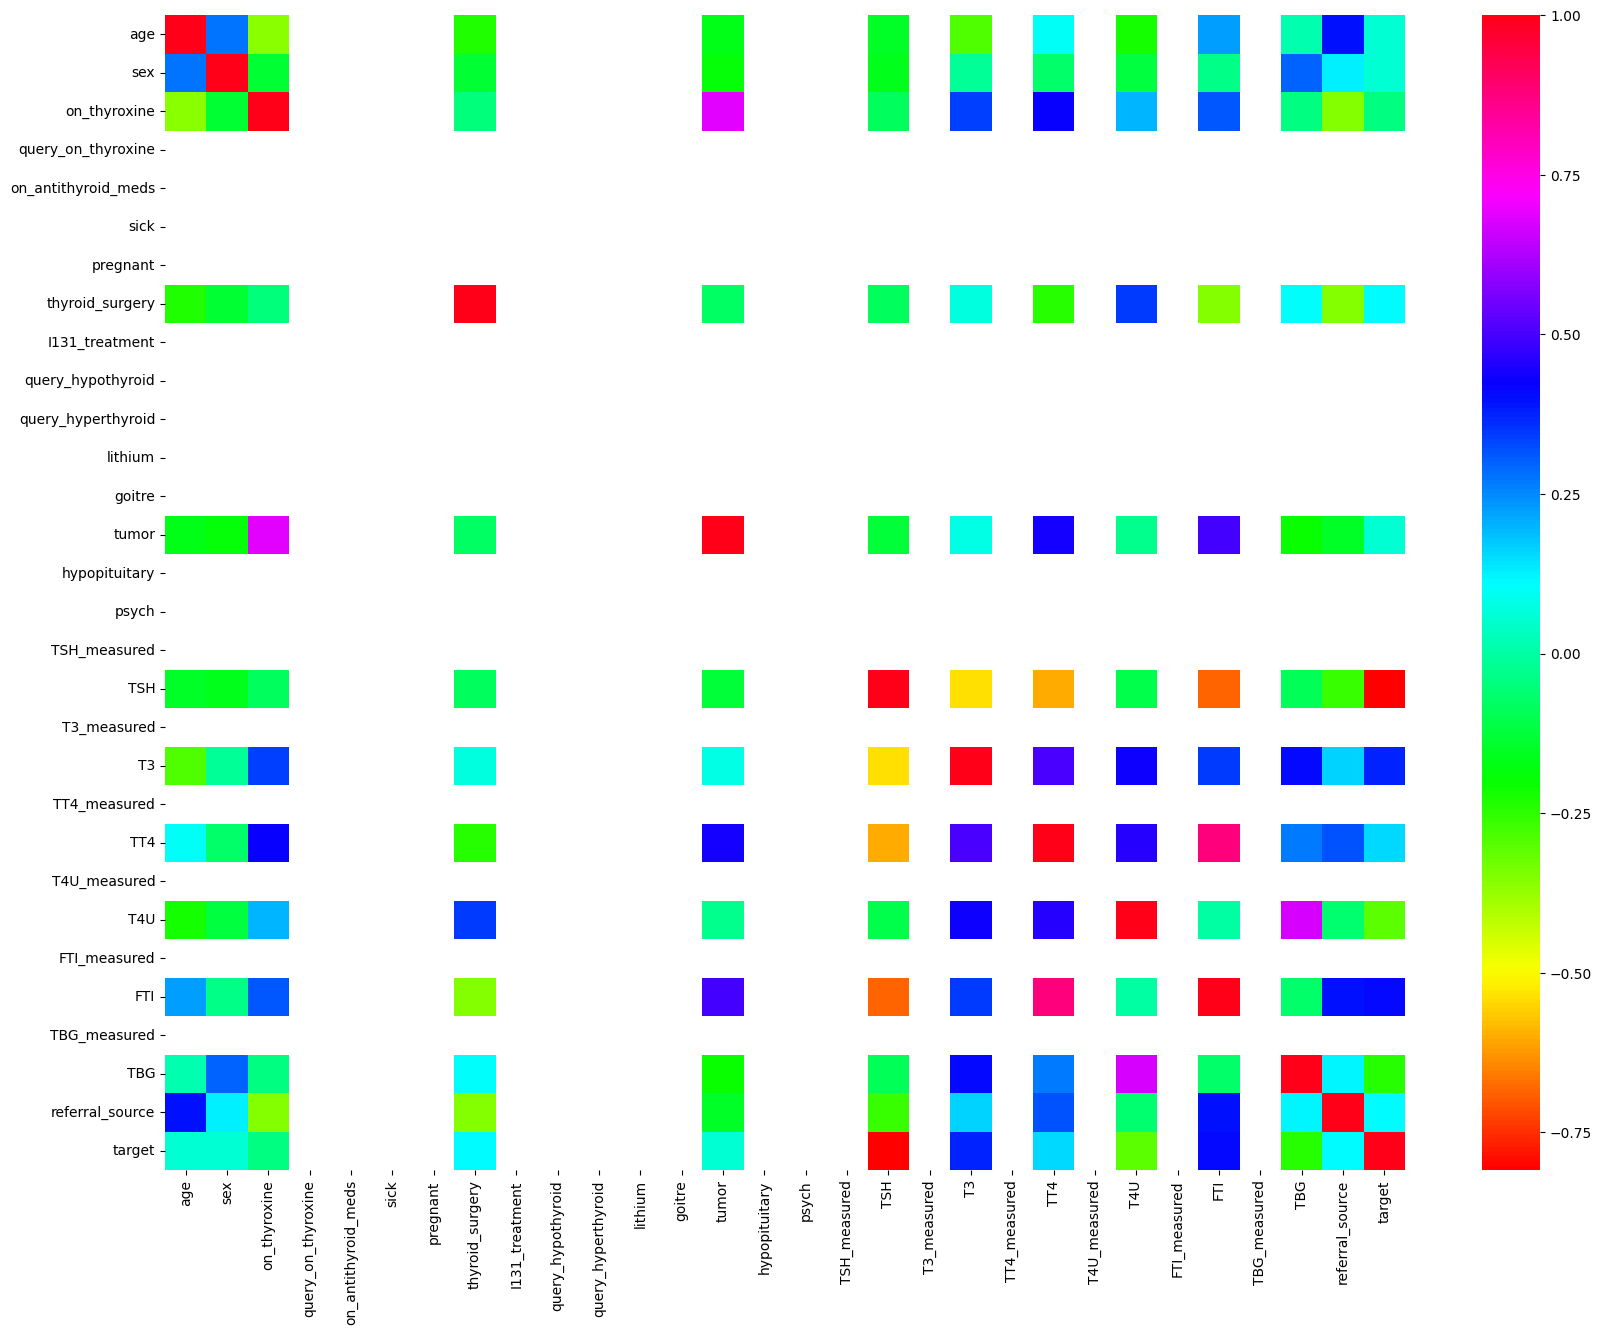

In [11]:
common.show_feature_correlation(all_df)